<a href="https://colab.research.google.com/github/alfazick/reflections/blob/master/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# connect to my local googledrive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab_Notebooks'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# install necessary packages
!pip install pytesseract
!sudo apt install tesseract-ocr


     |████████████████████████████████| 174kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/d5/90/56/ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00f

In [0]:
import zipfile

from PIL import Image, ImageDraw, ImageFont
from math import ceil
import pytesseract
import cv2 as cv
import numpy as np

face_cascade = cv.CascadeClassifier(root_path + '/haarcascade_frontalface_default.xml')

In [0]:
filename = root_path + '/images.zip'
dictionary = {}    
# dictionary where each value is a list. File name, image text, image bound boxes list, images of bounded boxes
#with zipfile.ZipFile('readonly/small_img.zip')as z:
with zipfile.ZipFile(filename)as z:
    for fileName in z.namelist():
        listInfo = []
        listInfo.append(fileName)
        with Image.open(z.open(fileName)) as img:
            listInfo.append(image_to_string(img))
            opencvImage = cv.cvtColor(np.array(img), cv.COLOR_RGB2BGR)
            faces = face_cascade.detectMultiScale(opencvImage,1.5,4)
            try:
                listInfo.append(faces.tolist())
            except:
                listInfo.append([])
            images = [] 
            try:
                for (x,y,w,h) in listInfo[2]:
                    images.append(img.crop((x,y,x+w,y+h)))
            except:
                x,y,w,h = listInfo[2]
                images.append(img.crop((x,y,x+w,y+h)))
            listInfo.append(images)
            dictionary[fileName] = listInfo    


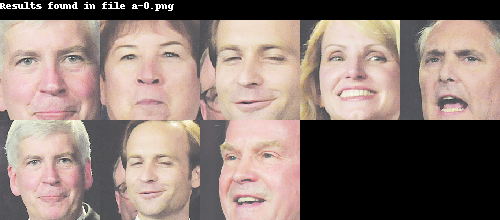

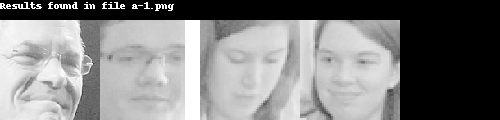

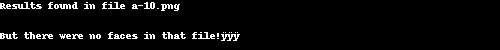

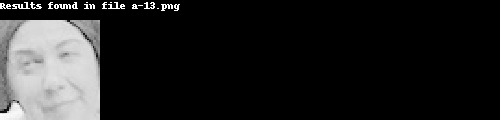

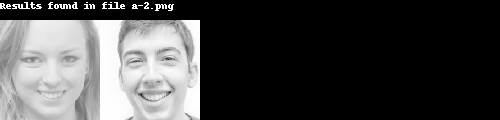

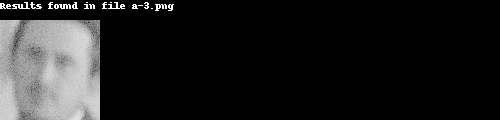

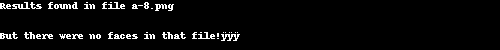

In [11]:
sheetList = []
for item in dictionary:
    if 'Mark' in dictionary[item][1]:
        im1 = Image.new('RGB', (500,20))
        im_with_text1 = ImageDraw.Draw(im1)
        im_with_text1.text((0,0),"Results found in file "+str(dictionary[item][0]))
        if len(dictionary[item][2]) == 0:
            im = Image.new('RGB', (500,50))
            im.paste(im1, (0, 0) )
            im_with_text2 = ImageDraw.Draw(im)
            im_with_text2.text((0,30),"But there were no faces in that file!")
            sheetList.append(im)
        else:
            im = Image.new('RGB', (500, 20+int(ceil((len(dictionary[item][2]))/5)*100) ))
            im.paste(im1, (0, 0) )
            i=0
            x=0
            for oneImage in dictionary[item][3]:
                im.paste(oneImage.resize((100,100)), (i*100,20+x*100) )
                i+=1
                if i % 5 == 0:
                    x+=1
                    i=0
            sheetList.append(im)
for i in sheetList:
    display(i)     

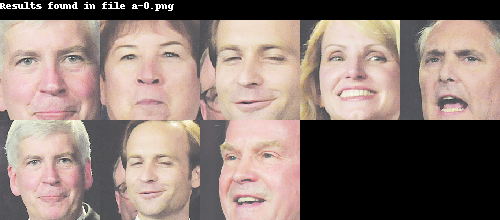

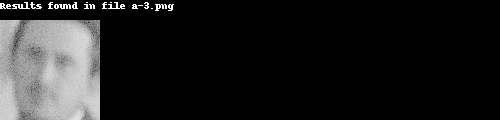

In [12]:
sheetList = []
for item in dictionary:
    if 'Christopher' in dictionary[item][1]:
        im1 = Image.new('RGB', (500,20))
        im_with_text1 = ImageDraw.Draw(im1)
        im_with_text1.text((0,0),"Results found in file "+str(dictionary[item][0]))
        if len(dictionary[item][2]) == 0:
            im = Image.new('RGB', (500,50))
            im.paste(im1, (0, 0) )
            im_with_text2 = ImageDraw.Draw(im)
            im_with_text2.text((0,30),"But there were no faces in that file!")
            sheetList.append(im)
        else:
            im = Image.new('RGB', (500, 20+int(ceil((len(dictionary[item][2]))/5)*100) ))
            im.paste(im1, (0, 0) )
            i=0
            x=0
            for oneImage in dictionary[item][3]:
                im.paste(oneImage.resize((100,100)), (i*100,20+x*100) )
                i+=1
                if i % 5 == 0:
                    x+=1
                    i=0
            sheetList.append(im)
for i in sheetList:
    display(i)